<a href="https://colab.research.google.com/github/Belajargihh/Klasifikasi_Alat_Tulis/blob/main/klasifikasi_alat_tulis_Hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 0. Mount Google Drive (jalankan dulu ini)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 📚 Step 2: Import Library
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
# ⚙️ Step 3: Konfigurasi
IMG_SIZE = (224, 224)
BATCH_SIZE = 128
EPOCHS = 10
DATA_DIR = '/content/drive/MyDrive/Alat_Tulis'  # Ganti sesuai path datasetmu
MODEL_PATH = '/content/drive/MyDrive/model_mobilenet_alat_tulis.keras'

In [13]:
# Ubah validation_split menjadi 0.2 (20% untuk validasi + test)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.3,
    shear_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Generator untuk data training (80%)
train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',  # 80% data
    shuffle=True,
    seed=42
)

# Generator untuk data validation (10%)
val_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # 10% data
    shuffle=False,
    seed=42
)

# Generator untuk data test (10%)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_generator = test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # 10% data
    shuffle=False,
    seed=42  # menggunakan seed yang sama
)

# Cetak jumlah gambar di setiap subset
print(f"Found {train_generator.samples} images for training ({train_generator.samples/(train_generator.samples+val_generator.samples+test_generator.samples)*100:.1f}%)")
print(f"Found {val_generator.samples} images for validation ({val_generator.samples/(train_generator.samples+val_generator.samples+test_generator.samples)*100:.1f}%)")
print(f"Found {test_generator.samples} images for testing ({test_generator.samples/(train_generator.samples+val_generator.samples+test_generator.samples)*100:.1f}%)")

Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 960 images for training (66.7%)
Found 240 images for validation (16.7%)
Found 240 images for testing (16.7%)


In [14]:
# 🧠 Step 5: Transfer Learning Model
base_model = ResNet50(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=3e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Hanya menggunakan ModelCheckpoint tanpa EarlyStopping
model_checkpoint = ModelCheckpoint(MODEL_PATH, save_best_only=True, monitor='val_accuracy', mode='max')

# Pada saat model.fit(), Anda tidak perlu memasukkan early_stop di callback
# callbacks=[model_checkpoint] saja

In [15]:
# 🚀 Step 6: Train Model (tetap sama)
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[model_checkpoint]
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 276s 34s/step - accuracy: 0.2626 - loss: 1.6878 - val_accuracy: 0.2667 - val_loss: 1.4047
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 297s 30s/step - accuracy: 0.2141 - loss: 1.5696 - val_accuracy: 0.2875 - val_loss: 1.3775
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 291s 35s/step - accuracy: 0.2943 - loss: 1.4633 - val_accuracy: 0.3042 - val_loss: 1.3744
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 272s 34s/step - accuracy: 0.2601 - loss: 1.4400 - val_accuracy: 0.2667 - val_loss: 1.3768
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 270s 36s/step - accuracy: 0.2959 - loss: 1.3944 - val_accuracy: 0.2708 - val_loss: 1.3744
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 251s 32s/step - accuracy: 0.2860 - loss: 1.3915 - val_accuracy: 0.3458 - val_loss: 1.3614
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 253s 31s/step - accuracy: 0.3093 - loss: 1.3693 - val_accuracy: 0.2833 - val_loss: 1.3628
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 248s 31s/step - accuracy: 0.3225 - loss: 1.3519 - val_accuracy: 0.2292 - val_loss:

In [16]:
# Evaluasi model pada data test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 59s 19s/step - accuracy: 0.2604 - loss: 1.3418
Test accuracy: 31.25%


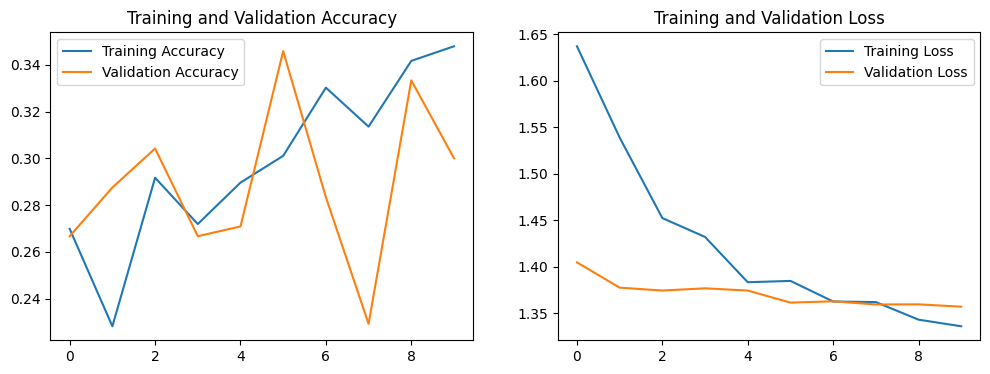

In [17]:
# Visualisasi hasil training dan testing
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Nama Kelas: ['Buku', 'Penghapus', 'Pensil', 'Polpen']
2/2 ━━━━━━━━━━━━━━━━━━━━ 67s 31s/step


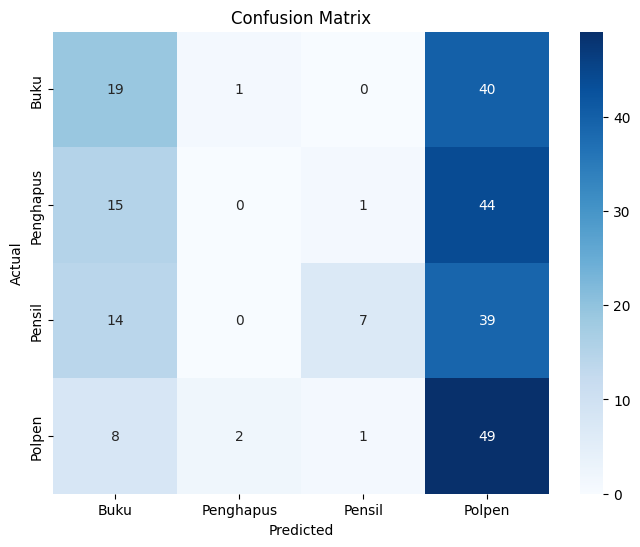

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dapatkan nama kelas
class_names = list(train_generator.class_indices.keys())
print("Nama Kelas:", class_names)

# Evaluasi model pada data test
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Matriks konfusi
conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Saving id-11134103-7r98p-loxlj3qsjdyy24.jpg to id-11134103-7r98p-loxlj3qsjdyy24.jpg


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 103MB/s] 


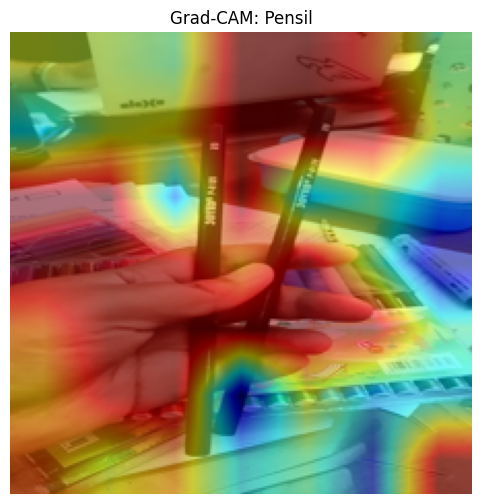

Predicted class index: 2
Predicted class name: Pensil
Output raw logits: tensor([[ 0.1357, -0.1126,  0.1782,  0.0264]], grad_fn=<AddmmBackward0>)


In [19]:
# === Upload Gambar ===
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# === Import Library ===
from PIL import Image
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import resnet50, ResNet50_Weights
import numpy as np
import cv2
import matplotlib.pyplot as plt

# === Setup Device ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Load Model ResNet50 ===
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
num_classes = 4  # Ganti sesuai jumlah kelas
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)
model.eval()

# === Class Names ===
class_names = ['Buku', 'Penghapus', 'Pensil', 'Polpen']

# === Preprocessing Gambar ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
img = Image.open(img_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# === Grad-CAM untuk ResNet50 ===
def grad_cam(model, image_tensor, target_class):
    model.eval()
    gradients, activations = [], []

    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0])

    def forward_hook(module, input, output):
        activations.append(output)

    # Gunakan layer terakhir sebelum FC: layer4
    final_conv = model.layer4
    f_handle = final_conv.register_forward_hook(forward_hook)
    b_handle = final_conv.register_full_backward_hook(backward_hook)

    output = model(image_tensor)
    model.zero_grad()
    class_loss = output[0][target_class]
    class_loss.backward()

    grads = gradients[0].detach().cpu().numpy()[0]
    acts = activations[0].detach().cpu().numpy()[0]
    weights = np.mean(grads, axis=(1, 2))

    cam = np.zeros(acts.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * acts[i, :, :]
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, (224, 224))
    cam = (cam - cam.min()) / (cam.max() + 1e-8)

    f_handle.remove()
    b_handle.remove()
    return cam

# === Prediksi dan Tampilkan Grad-CAM ===
output = model(input_tensor)
pred_class = output.argmax(1).item()
heatmap = grad_cam(model, input_tensor, pred_class)

if heatmap is not None:
    img_np = np.array(img.resize((224, 224)))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img_np, 0.5, heatmap_colored, 0.5, 0)

    plt.figure(figsize=(6,6))
    plt.imshow(overlayed_img)
    plt.title(f"Grad-CAM: {class_names[pred_class]}")
    plt.axis('off')
    plt.show()

    print("Predicted class index:", pred_class)
    print("Predicted class name:", class_names[pred_class])
print("Output raw logits:", output)
